In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv("PrePlacement_data.csv")

In [3]:
data

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1,67.00,91.00,58.00,55.0,58.80,270000.0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2,79.33,78.33,77.48,86.5,66.28,200000.0,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3,65.00,68.00,64.00,75.0,57.80,250000.0,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4,56.00,52.00,52.00,66.0,59.43,0.0,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5,85.80,73.60,73.30,96.8,55.50,425000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,91.0,74.49,400000.0,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,212,58.00,60.00,72.00,74.0,53.62,275000.0,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,213,67.00,67.00,73.00,59.0,69.72,295000.0,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,214,74.00,66.00,58.00,70.0,60.23,204000.0,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [4]:
data.isnull().sum()

sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [5]:
data.cov()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,3870.000000,-52.641355,-59.598879,-41.465047,52.556168,8.102336,1.138318e+04
ssc_p,-52.641355,117.228377,58.853253,42.702550,37.659225,24.535952,9.088585e+05
hsc_p,-59.598879,58.853253,112.063731,33.684453,33.838355,21.517688,7.310079e+05
degree_p,-41.465047,42.702550,33.684453,53.604710,22.078774,17.185200,4.663363e+05
etest_p,52.556168,37.659225,33.838355,22.078774,176.251018,16.886973,3.727004e+05
mba_p,8.102336,24.535952,21.517688,17.185200,16.886973,34.028376,1.239934e+05
salary,11383.177570,908858.485818,731007.850848,466336.264888,372700.449468,123993.387361,2.259185e+10


In [6]:
# The covariance between degree_p and etest_p is 22.078774 which mean that there is positive covariance(i.e.difference in posiive values).
# The covariance between etest_p and mba_p is 16.886973 which mean that there is positive covariance(i.e.difference in posiive values).

In [7]:
data.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.090500,-0.091039,0.063636,0.022327,0.001217
ssc_p,-0.078155,1.000000,0.513478,0.538686,0.261993,0.388478,0.558475
hsc_p,-0.090500,0.513478,1.000000,0.434606,0.240775,0.348452,0.459424
degree_p,-0.091039,0.538686,0.434606,1.000000,0.227147,0.402376,0.423762
etest_p,0.063636,0.261993,0.240775,0.227147,1.000000,0.218055,0.186775
mba_p,0.022327,0.388478,0.348452,0.402376,0.218055,1.000000,0.141417
salary,0.001217,0.558475,0.459424,0.423762,0.186775,0.141417,1.000000


In [8]:
# The correlation between mba_p and salary is 0.141 that is 14% -----> positive correlation

In [9]:
data.drop("sl_no",inplace=True,axis=1)

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(x):
    vif=pd.DataFrame()
    vif["Variables"]=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [11]:
cal_vif(data[["ssc_p","hsc_p","degree_p","etest_p","mba_p","salary"]])

,Variables,VIF
0,ssc_p,78.168671
1,hsc_p,61.882196
2,degree_p,114.820554
3,etest_p,32.720365
4,mba_p,116.034378
5,salary,4.171783


In [12]:
#There are two ways to reduce the VIF value in reflect that reduces the multi-colinearity in the dataset

# 1) By rejecting the some independent variable
# 2) By combining two independent variable into same variable using PCA

# By rejecting the some independent variable

In [13]:
cal_vif(data[["ssc_p","hsc_p","degree_p","etest_p","salary"]])

,Variables,VIF
0,ssc_p,72.865809
1,hsc_p,57.324468
2,degree_p,82.888155
3,etest_p,31.000893
4,salary,3.586945


In [14]:
cal_vif(data[["ssc_p","hsc_p","etest_p","salary"]])

,Variables,VIF
0,ssc_p,52.626622
1,hsc_p,47.783807
2,etest_p,27.957044
3,salary,3.507225


# By combining two independent variable into same variable using PCA

In this we use the PCA method from sklearn.decomposition,
By using that, we combine two independent variables (having more correlation) into same variable 

In [15]:
corr_matrix=data.corr()

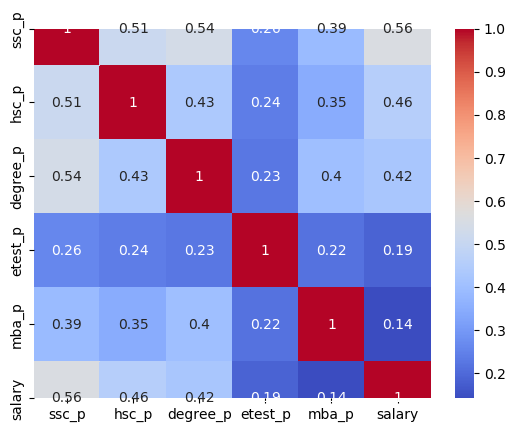

In [16]:
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')

In [17]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1)
data['pca']=pca.fit_transform(data[['ssc_p','degree_p']])

C:\Users\91636\anaconda3\envs\hopeai\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\91636\anaconda3\envs\hopeai\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  me

In [18]:
cal_vif(data[["pca","hsc_p","etest_p","mba_p","salary"]])

,Variables,VIF
0,pca,1.408695
1,hsc_p,55.431482
2,etest_p,31.484330
3,mba_p,63.387119
4,salary,4.365226


In [19]:
new_data=data[["hsc_p","etest_p","mba_p","pca"]]

In [20]:
new_matrix=new_data.corr()

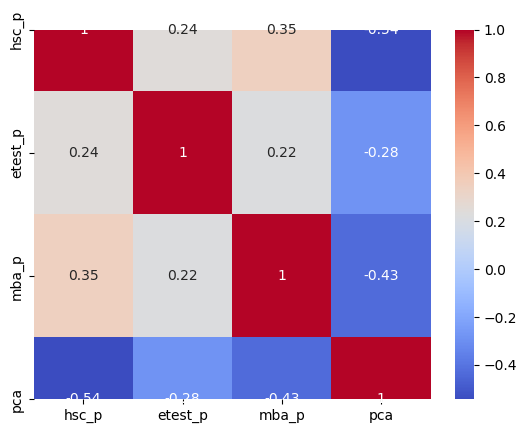

In [21]:
sns.heatmap(new_matrix,annot=True,cmap='coolwarm')

In [22]:
data['pca_1']=pca.fit_transform(data[['mba_p','etest_p']])

In [23]:
cal_vif(data[["pca","hsc_p","pca_1","salary"]])

,Variables,VIF
0,pca,1.440129
1,hsc_p,3.802895
2,pca_1,1.097113
3,salary,4.298046


# T-test

# Independent / unpaired t-test

diferent groups: same condition

In [24]:
from scipy.stats import ttest_ind
data=data.dropna()
male=data[data["gender"]=="M"]["salary"]
female=data[data["gender"]=="F"]["salary"]

ttest_ind(male,female)

Ttest_indResult(statistic=2.0937842507001165, pvalue=0.03746230397067219)

In [25]:
# since the p-value is 0.037, it mean that there is less difference between salary of male and female

In [26]:
#(central,others)==>(salary)

central=data[data["hsc_b"]=="Central"]["salary"]
others=data[data["hsc_b"]=="Others"]["salary"]

ttest_ind(central,others)

Ttest_indResult(statistic=-0.30570032095155825, pvalue=0.7601313863865756)

In [27]:
# since the p-value is 0.760, it mean that there is more difference between salary of central and other board students in hsc

# Dependent / paired t-test

one group - differnt condition

In [28]:
from scipy.stats import ttest_rel

hsc=data[data["gender"]=="M"]["hsc_p"]
ssc=data[data["gender"]=="M"]["ssc_p"]

ttest_rel(hsc,ssc)

Ttest_relResult(statistic=-0.6842940392688153, pvalue=0.4949370716000775)

In [29]:
# the p-value is 0.49 is nearly 0.5. So half of the data is similar in both condn(hsc,ssc) but other half is different

In [30]:
#(science)==>(mba_p,etest_p)

mba=data[data["hsc_s"]=="Commerce"]["mba_p"]
etest=data[data["hsc_s"]=="Commerce"]["etest_p"]

ttest_rel(mba,etest)

Ttest_relResult(statistic=-7.868552092606869, pvalue=2.462926468454984e-12)

# Anova

In [31]:
#one_way anova

In [32]:
import scipy.stats as stats
stats.f_oneway(data['ssc_p'],data['hsc_p'],data['degree_p'])

F_onewayResult(statistic=0.695991304348204, pvalue=0.49895574725815317)

In [33]:
import pingouin as pg

C:\Users\91636\anaconda3\envs\hopeai\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [35]:
anova_results = pg.anova(dv='salary', between=['gender','hsc_b'], data=data, detailed=True)
print(anova_results)

           Source            SS     DF            MS         F     p-unc  \
0          gender  9.602993e+10    1.0  9.602993e+10  4.292081  0.039506   
1           hsc_b  6.507874e+08    1.0  6.507874e+08  0.029087  0.864742   
2  gender * hsc_b  1.564402e+10    1.0  1.564402e+10  0.699213  0.403994   
3        Residual  4.720861e+12  211.0  2.237375e+10       NaN       NaN   

        np2  
0  0.019936  
1  0.000138  
2  0.003303  
3       NaN  


In [37]:
# gender has signifiacnt result but hsc_b has no significant result
# there is no significant interaction between gender and hsc_b

In [36]:
anova_results = pg.anova(dv='salary', between=['gender','hsc_s'], data=data, detailed=True)
print(anova_results)

           Source            SS     DF            MS         F     p-unc  \
0          gender  8.591900e+10    1.0  8.591900e+10  3.865388  0.050616   
1           hsc_s  3.405711e+10    2.0  1.702855e+10  0.766093  0.466126   
2  gender * hsc_s  5.749256e+10    2.0  2.874628e+10  1.293259  0.276561   
3        Residual  4.645606e+12  209.0  2.222778e+10       NaN       NaN   

        np2  
0  0.018159  
1  0.007278  
2  0.012224  
3       NaN  


In [38]:
# gender has signifiacnt result but hsc_s has no significant result
# there is no significant interaction between gender and hsc_s